In [2]:
import pandas as pd
import numpy as np

from scipy.fft import fft
from scipy.stats import skew, kurtosis
import statistics as stc

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import configparser

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')
FRAME_SIZE = config.getint('Default', 'FRAME_SIZE')
PATH_DATA_TO_PREDICT= config.get('Paths', 'PATH_DATA_TO_PREDICT')
PATH_PROCESSED_DATA = config.get('Paths', 'PATH_PROCESSED_DATA')
PATH_PROCESSED_SCHEMA = config.get('Paths', 'PATH_PROCESSED_SCHEMA')

In [4]:
## data paths loading

# Wear files
acier_usure_120_100 = "row_data/wear/26'_2022_01_11_171848_120%_100%_S_US.xlsx"
#acier_usure_75_75 = "row_data/wear/27_2022_01_11_173748_75%_75%_S_US.xlsx"
#acier_usure_50_50 = "row_data/wear/28_2022_01_11_180139_50%_50%_S_US.xlsx"
#acier_usure_50_100 = "row_data/wear/36_2022_01_12_120232_50%_100%_S_US.xlsx"
#acier_usure_120_50 = "row_data/wear/37_2022_01_12_123547_120%_50%_S_US.xlsx"


# No wear files
acier_simp_120_100 = "row_data/no_wear/01_2022_01_10_092455_120%_100%_S.xlsx"
 
#acier_simp_50_100 = "row_data/no_wear/04_2022_01_10_101238_50%_100%_S.xlsx"
#acier_simp_75_75 = "row_data/no_wear/07_2022_01_10_111456_75%_75%_S.xlsx"
#acier_simp_120_50 = "row_data/no_wear/09_2022_01_10_115034_120%_50%_S.xlsx"
#acier_simp_50_50 = "row_data/no_wear/12_2022_01_10_130747_50%_50%_S.xlsx"
 


In [5]:
def load_df(link):
    data_frames = []
    excel_file = pd.ExcelFile(link)
    print(excel_file.sheet_names)
    sheets = excel_file.sheet_names[:len(excel_file.sheet_names)-2]
    print(f'Sheets : {sheets}')
    for i in range(len(sheets)-1, -1, -1):
        data = excel_file.parse(sheets[i])
        data = data.drop(data.index[0])
        data_frames.append(data)
        merged_data = pd.concat(data_frames, ignore_index=True)
        merged_data["Time"] = merged_data["Time"].astype(float)
        merged_data["acc_broche"] = merged_data["acc_broche"].astype(float)
        merged_data["acc_table"] = merged_data["acc_table"].astype(float)
    return merged_data

In [14]:
# With wear data
us_120_100 = load_df(acier_usure_120_100)
#us_75_75 = load_df(acier_usure_75_75) #df d'expé sur de l'acier usé à 75%, 75% et avec lubrifiant
#us_50_50 = load_df(acier_usure_50_50)
#us_50_100 = load_df(acier_usure_50_100)
#us_120_50 = load_df(acier_usure_120_50)

print('---')
# Without wear data
nus_120_100 = load_df(acier_simp_120_100)
#nus_50_100 = load_df(acier_simp_50_100)
#nus_75_75 = load_df(acier_simp_75_75) #df d'expé sur de l'acier à 75%, 75% et avec lubrifiant
#nus_120_50 = load_df(acier_simp_120_50)
#nus_50_50 = load_df(acier_simp_50_50)

['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']
---
['Data1-1', 'Data1', 'Events', 'DataInfo']
Sheets : ['Data1-1', 'Data1']


In [17]:
nus_120_100.sample(3)

,Time,acc_broche,acc_table
867857,433.9285,-0.022193,0.002702
724839,362.4195,-0.001807,0.000302
931107,465.5535,-0.092016,-0.002882


In [27]:
# Get last sequence as test set
def getseq(data, lower_bound, upper_bound):
    return data[(data['Time'] >= lower_bound) & (data['Time'] <= upper_bound)]
#def nullvalues(df1, df2):
    

In [30]:
def plot_data(data):
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
    ax1.plot(data['Time'], data['acc_broche'], label='acc_broche')
    ax1.plot(data['Time'], data['acc_table'], label='acc_table')
    ax1.set_title('Train set')
    ax1.legend()
    plt.show()

In [9]:
#lower_bound = 000.0000
#upper_bound = 990.0000
#nus_50_50_set = getseq(nus_50_50, lower_bound, upper_bound)
#plot_data(nus_50_50_set)

In [10]:
#lower_bound = 000.0000
#upper_bound = 990.0000
#nus_120_50_set = getseq(nus_120_50, lower_bound, upper_bound)
#plot_data(nus_120_50_set)

In [11]:
#lower_bound = 000.0000
#upper_bound = 480.0000
#nus_75_75_set = getseq(nus_75_75, lower_bound, upper_bound)
#plot_data(nus_75_75_set)

In [12]:
#lower_bound = 000.0000
#upper_bound = 980.0000
#nus_50_100_set = getseq(nus_50_100, lower_bound, upper_bound)
#plot_data(nus_50_100_set)

     Time  acc_broche  acc_table
0  0.0000   -0.083861  -0.013599
1  0.0005    0.009148  -0.012512
2  0.0010    0.046630  -0.006063
3  0.0015   -0.071559  -0.003705
4  0.0020    0.057094  -0.008697


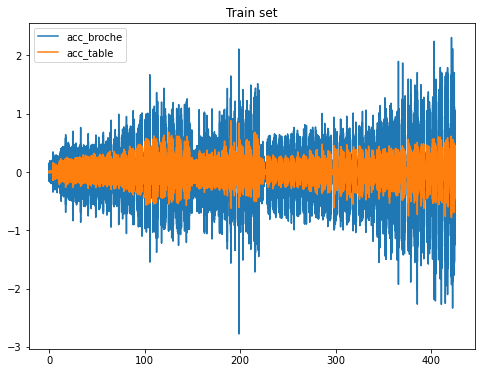

In [31]:
lower_bound = 000.0000
upper_bound = 425.0000
nus_120_100_set = getseq(nus_120_100, lower_bound, upper_bound)
print(nus_120_100_set.head()) 
plot_data(nus_120_100_set)

In [32]:
#lower_bound = 000.0000
#upper_bound = 430.0000
#us_120_50_set = getseq(us_120_50, lower_bound, upper_bound)
#plot_data(us_120_50_set)

In [33]:
#lower_bound = 000.0000
#upper_bound = 1000.0000
#us_50_100_set = getseq(us_50_100, lower_bound, upper_bound)
#plot_data(us_50_100_set)

In [39]:
#lower_bound = 000.0000
#upper_bound = 980.0000
#us_50_50_set = getseq(us_50_50, lower_bound, upper_bound)
#plot_data(us_50_50_set)

In [34]:
#lower_bound = 000.0000
#upper_bound = 675.0000
#us_75_75_set = getseq(us_75_75, lower_bound, upper_bound)
#plot_data(us_75_75_set)

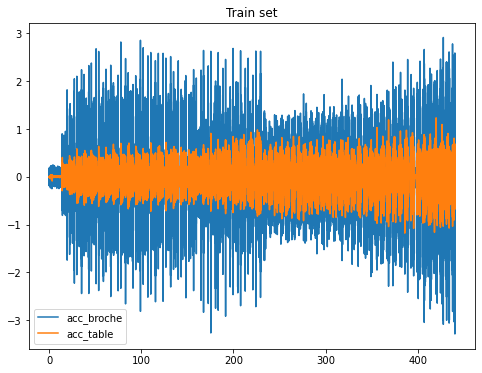

In [35]:
##
lower_bound = 000.0000
upper_bound = 440.5000
us_120_100_set = getseq(us_120_100, lower_bound, upper_bound)
plot_data(us_120_100_set)

In [37]:
from datastats.preprocessor import dataTransformer

In [42]:
def create_train_test(df):
    X_train = df[0: int(len(df)*0.7)]
    X_test = df[int(len(df)*0.3):]
    return X_train, X_test

In [44]:
## Dataset creation for signals with weared tool

df_us_120_100 = dataTransformer(us_120_100_set["acc_broche"], us_120_100_set["acc_table"])
df_us_120_100["wear"] = 1
us_120_100_train, us_120_100_test = create_train_test(df_us_120_100)


#df_us_75_75 = dataTransformer(us_75_75_set["acc_broche"], us_75_75_set["acc_table"])
#df_us_75_75["wear"] = 1
#us_75_75_train, us_75_75_test = create_train_test(df_us_75_75)
 
#df_us_50_50 = dataTransformer(us_50_50_set["acc_broche"], us_50_50_set["acc_table"])
#df_us_50_50["wear"] = 1
#us_50_50_train, us_50_50_test = create_train_test(df_us_50_50)
 
#df_us_50_100 = dataTransformer(us_50_100_set["acc_broche"], us_50_100_set["acc_table"])
#df_us_50_100["wear"] = 1
#us_50_100_train, us_50_100_test = create_train_test(df_us_50_100)
 
#df_us_120_50 = dataTransformer(us_120_50_set["acc_broche"], us_120_50_set["acc_table"])
#df_us_120_50["wear"] = 1
#us_120_50_train, us_120_50_test = create_train_test(df_us_120_50)

In [46]:
## Dataset creation for signals with no weared tool

df_nus_120_100 = dataTransformer(nus_120_100_set["acc_broche"], nus_120_100_set["acc_table"])
df_nus_120_100["wear"] = 0
nus_120_100_train, nus_120_100_test = create_train_test(df_nus_120_100)

#df_nus_50_100 = dataTransformer(nus_50_100_set["acc_broche"], nus_50_100_set["acc_table"])
#df_nus_50_100["wear"] = 0
#nus_50_100_train, nus_50_100_test = create_train_test(df_nus_50_100)

#df_nus_75_75 = dataTransformer(nus_75_75_set["acc_broche"], nus_75_75_set["acc_table"])
#df_nus_75_75["wear"] = 0
#nus_75_75_train, nus_75_75_test = create_train_test(df_nus_75_75)

#df_nus_120_50 = dataTransformer(nus_120_50_set["acc_broche"], nus_120_50_set["acc_table"])
#df_nus_120_50["wear"] = 0
#nus_120_50_train, nus_120_50_test = create_train_test(df_nus_120_50)

#df_nus_50_50 = dataTransformer(nus_50_50_set["acc_broche"], nus_50_50_set["acc_table"])
#df_nus_50_50["wear"] = 0
#nus_50_50_train, nus_50_50_test = create_train_test(df_nus_50_50)

In [25]:
#data_to_predict = pd.concat([us_120_100_train.head(), nus_120_100_train.head(), us_75_75_train.head(), nus_50_100_train.head(), us_50_50_train.head(), nus_75_75_train.head(), us_50_100_train.head(), nus_120_50_train.head(), us_120_50_train.head(), nus_50_50_train.head()], axis=0, ignore_index=True)

In [47]:
data_to_predict = pd.concat([us_120_100_train.head(), nus_120_100_train.head()], axis=0, ignore_index=True)

In [48]:
data_to_predict

,Mean_b,STD_b,Variance_b,RMS_b,Peak_val_b,Skewness_b,Kurtosis_b,Crest_factor_b,Margin_factor_b,SHape_factor_b,...,Peak_val_t,Skewness_t,Kurtosis_t,Crest_factor_t,Margin_factor_t,SHape_factor_t,Impulse_factor_t,A_factor_t,B_factor_t,wear
0,0.231680,0.060606,4.356046,0.060606,0.003673,0.053758,0.005995,0.275552,4.840777,5787.244362,...,0.003673,0.053758,0.005995,0.275552,4.840777,5787.244362,-0.000176,1040.748012,0.430833,1
1,0.245872,0.061711,-53.312761,0.061710,0.003808,-0.004700,0.019759,0.277932,5.082121,6132.576924,...,0.003808,-0.004700,0.019759,0.277932,5.082121,6132.576924,-0.000383,1046.288876,-17.069127,1
2,0.222157,0.056730,-5.047559,0.056730,0.003218,-0.044013,0.056726,0.267512,4.939971,5706.995471,...,0.003218,-0.044013,0.056726,0.267512,4.939971,5706.995471,0.000036,1216.823670,-5.046742,1
3,0.224365,0.058176,-3.609135,0.058174,0.003384,-0.066311,0.134776,0.270363,5.168873,6037.656468,...,0.003384,-0.066311,0.134776,0.270363,5.168873,6037.656468,0.000475,1139.649141,-8.360707,1
4,0.209168,0.059585,-5.068019,0.059582,0.003550,-0.048860,-0.073512,0.272744,5.188281,6151.753570,...,0.003550,-0.048860,-0.073512,0.272744,5.188281,6151.753570,-0.000653,988.913457,6.252307,1
5,0.193393,0.054172,-9.096728,0.054162,0.002934,-0.021927,-0.016339,0.260335,4.606593,5201.484268,...,0.002934,-0.021927,-0.016339,0.260335,4.606593,5201.484268,-0.001015,1217.169859,2.743981,0
6,0.343727,0.070574,-37.419632,0.070572,0.004980,-0.009233,0.599843,0.300973,6.283229,8052.222588,...,0.004980,-0.009233,0.599843,0.300973,6.283229,8052.222588,0.000566,977.952292,-318.025462,0
7,0.293032,0.079085,4.969035,0.079085,0.006254,0.061792,0.012451,0.314614,4.859276,6632.719832,...,0.006254,0.061792,0.012451,0.314614,4.859276,6632.719832,0.000067,592.416746,0.782247,0
8,0.278147,0.069052,9.309169,0.069052,0.004768,0.038151,0.163521,0.294303,6.451408,8218.334073,...,0.004768,0.038151,0.163521,0.294303,6.451408,8218.334073,-0.000084,844.792675,22.042820,0
9,0.395998,0.090493,6.616671,0.090493,0.008189,0.075940,2.196058,0.354107,7.693890,10958.321604,...,0.008189,0.075940,2.196058,0.354107,7.693890,10958.321604,-0.000127,534.372048,160.554965,0


In [49]:
data_train = pd.concat([us_120_100_train.drop(us_120_100_train.index[:5]), nus_120_100_train.drop(nus_120_100_train.index[:5])], axis=0, ignore_index=True)


data_test = pd.concat([us_120_100_test, nus_120_100_test], axis=0, ignore_index=True)

In [ ]:
#data_train = pd.concat([us_120_100_train.drop(us_120_100_train.index[:5]), nus_120_100_train.drop(nus_120_100_train.index[:5]), us_75_75_train.drop(us_75_75_train.index[:5]), nus_50_100_train.drop(nus_50_100_train.index[:5]), us_50_50_train.drop(us_50_50_train.index[:5]), nus_75_75_train.drop(nus_75_75_train.index[:5]), us_50_100_train.drop(us_50_100_train.index[:5]), nus_120_50_train.drop(nus_120_50_train.index[:5]), us_120_50_train.drop(us_120_50_train.index[:5]), nus_50_50_train.drop(nus_50_100_train.index[:5])], axis=0, ignore_index=True)


#data_test = pd.concat([us_120_100_test, nus_120_100_test, us_75_75_test, nus_50_100_test, us_50_50_test, nus_75_75_test, us_50_100_test, nus_120_50_test, us_120_50_test, nus_50_50_test], axis=0, ignore_index=True)

In [50]:
a = list(data_train.columns)
target = a.pop()
features_name = a

In [51]:
X_train = data_train[features_name]
Y_train = data_train[target]

X_test = data_test[features_name]
Y_test = data_test[target]

In [52]:
X_val = data_to_predict[features_name]
Y_val = data_to_predict[target]

In [ ]:
import os

In [58]:
# Save the schema corresponding to the preprocessed data

directory = os.path.dirname(PATH_PROCESSED_SCHEMA)

if not os.path.exists(directory):
    os.makedirs(directory)

with open(PATH_PROCESSED_SCHEMA, 'wb') as file:
    pickle.dump((features_name, target), file)

In [59]:
# Save the preprocessed data
with open(PATH_PROCESSED_DATA, 'wb') as file:
    pickle.dump((X_train, X_test, Y_train, Y_test), file)

In [60]:
# Save the data to predict
with open(PATH_DATA_TO_PREDICT, 'wb') as file:
    pickle.dump((X_val, Y_val), file)